# Planar Drone: Flight around Obstacle

## Housekeeping

Import packages for simulating dynamic system

In [1]:
import numpy as np
import scipy.io as sio
import sys
from os import path
sys.path.append(path.join('..', '..', 'lib'))
from planar_drone import PlanarDrone

Import packages for visualizing simulation results

In [2]:
import matplotlib.pyplot as plt

Load reference trajectories

In [3]:
data = sio.loadmat('simulate_drone_data.mat')['reference']
input_trajectory = data[0][0][1][0][0][0][:, :2]
state_trajectory_ref = data[0][0][1][0][0][0][:, 2:]

## Simulation

Run simulation with given input trajectory

In [4]:
drone = PlanarDrone()
drone.set_state([0, 0, 0, 0, 0, 0])
state_trajectory = np.zeros((drone.n_states, input_trajectory.shape[0] + 1))
counter = 1
for action in input_trajectory:
    drone.simulate_step(action[:])
    state_trajectory[:, counter] = drone.get_state()
    counter += 1

Visualize results

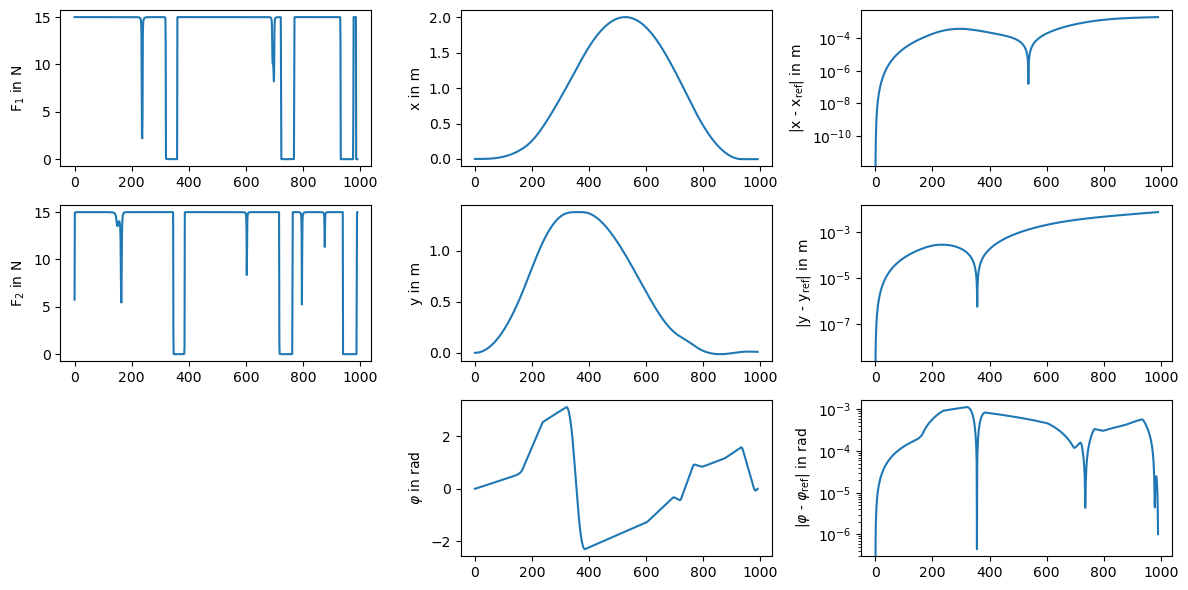

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6))

# Plot input trajectory
ax[0][0].plot(input_trajectory[:, 0])
ax[0][0].set(ylabel="F$_1$ in N")
ax[1][0].plot(input_trajectory[:, 1])
ax[1][0].set(ylabel="F$_2$ in N")
ax[2][0].remove()

# Plot output trajectory
ax[0][1].plot(state_trajectory[0])
ax[1][1].plot(state_trajectory[1])
ax[2][1].plot(state_trajectory[2])
ax[0][1].set(ylabel="x in m")
ax[1][1].set(ylabel="y in m")
ax[2][1].set(ylabel=r"$\varphi$ in rad")

# Plot deviation from reference simulation
ax[0][2].plot(abs(state_trajectory[0, :-1] - state_trajectory_ref[:, 0]))
ax[1][2].plot(abs(state_trajectory[1, :-1] - state_trajectory_ref[:, 1]))
ax[2][2].plot(abs(state_trajectory[2, :-1] - state_trajectory_ref[:, 4]))
for ii in range(3):
    ax[ii][2].set_yscale('log')
ax[0][2].set(ylabel="|x - x$_\mathregular{ref}$| in m")
ax[1][2].set(ylabel="|y - y$_\mathregular{ref}$| in m")
ax[2][2].set(ylabel=r"|$\varphi$ - $\varphi_\mathregular{ref}$| in rad")

fig.tight_layout()
plt.show()